# CA with plotnine

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from scientisttools import load_women_work
women_work = load_women_work()
women_work

,stay.at.home,part-time.work,full-time.work,housewives.cut.from.world.totally.agree,housewives.cut.from.world.quite.agree,housewives.cut.from.world.quite.disagree,housewives.cut.from.world.totally.disagree
both.man.and.woman.work,13,142,106,107,75,40,39
man.morks.more,30,408,117,192,175,100,88
only.man.works,241,573,94,140,215,254,299


In [3]:
# Modèle avec colonnes supplémentaires
from scientisttools import CA
my_ca = CA(n_components=None,col_sup=[3,4,5,6])
my_ca.fit(women_work)

CA(col_sup=[3, 4, 5, 6], n_components=None)

## Row points - CA

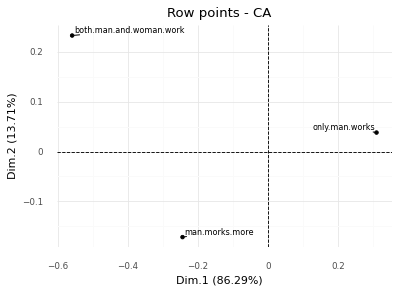

In [4]:
from scientisttools import fviz_ca_row
p = fviz_ca_row(my_ca,repel=True)
print(p)

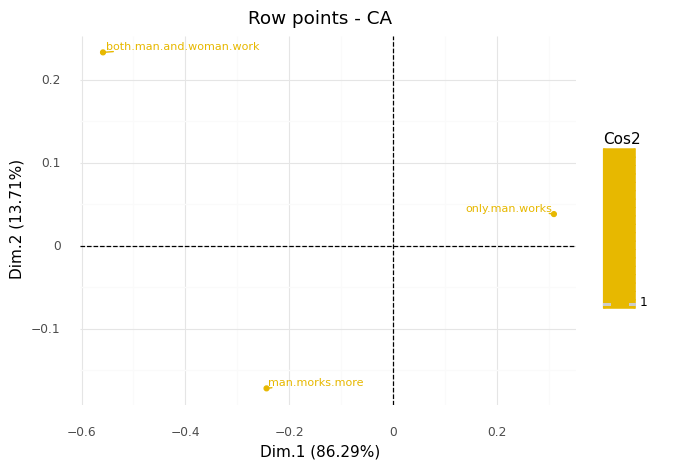

In [5]:
p = fviz_ca_row(my_ca,color="cos2",repel=True)
print(p)

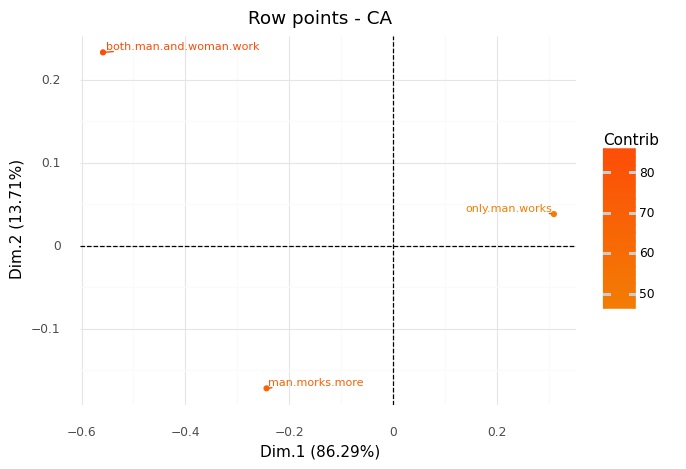

In [6]:
p = fviz_ca_row(my_ca,color="contrib",repel=True)
print(p)

In [7]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=3)
color_numpy

array([-1.0856306 ,  0.99734545,  0.2829785 ])

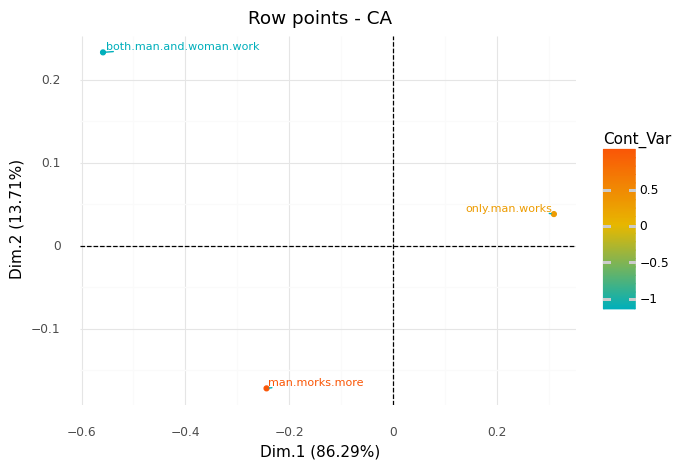

In [8]:
p = fviz_ca_row(my_ca,color=color_numpy,repel=True)
print(p)

In [9]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(my_ca.row_["coord"])
kmeans.labels_

array([2, 1, 0])

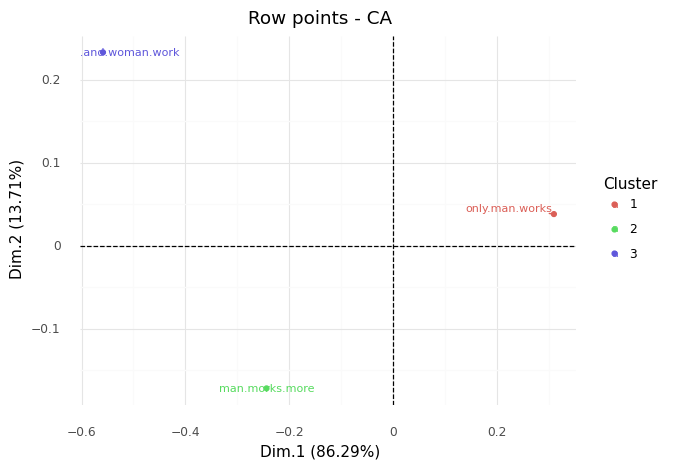

In [10]:
p = fviz_ca_row(my_ca,color=kmeans,repel=True)
print(p)

## Columns points - CA

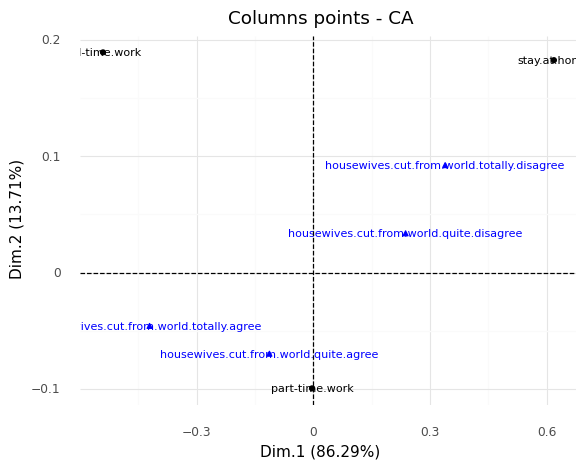

In [11]:
from scientisttools import fviz_ca_col
p = fviz_ca_col(my_ca,repel=False)
print(p)

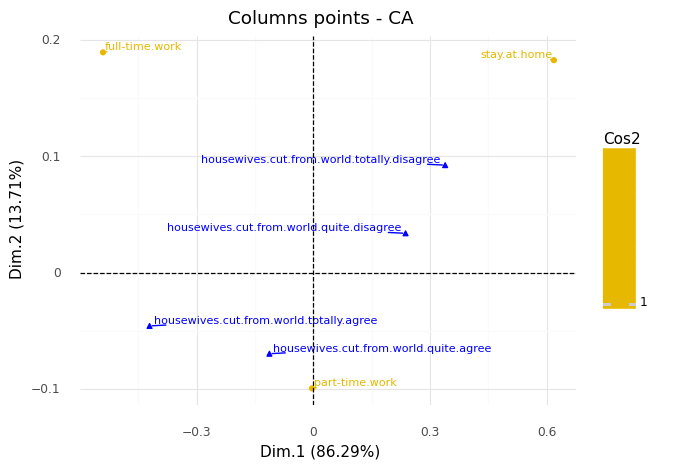

In [12]:
p = fviz_ca_col(my_ca,color="cos2",repel=True)
print(p)

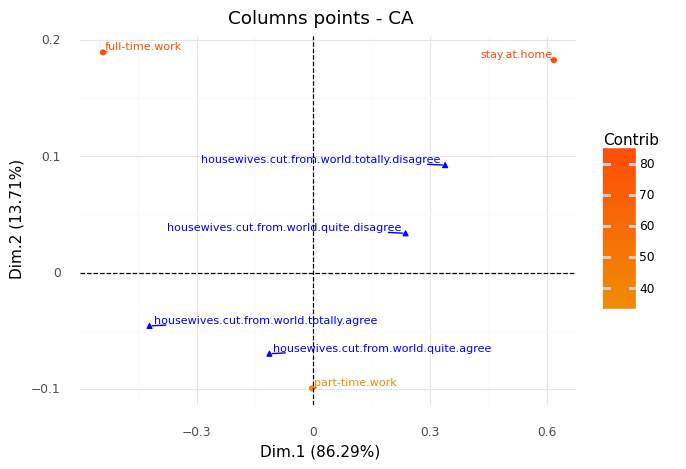

In [13]:
p = fviz_ca_col(my_ca,color="contrib",repel=True)
print(p)

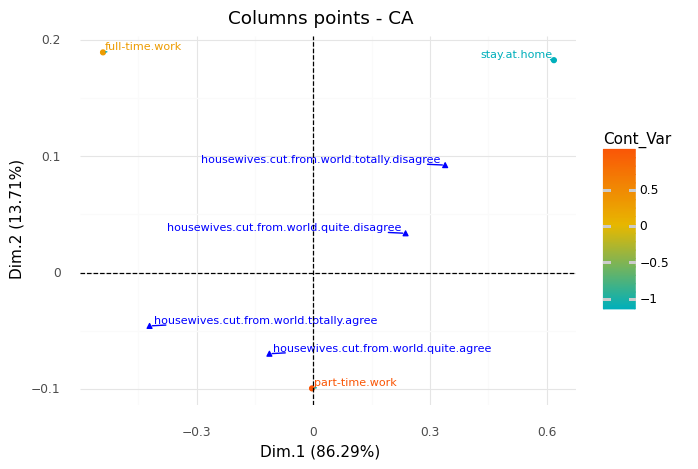

In [14]:
np.random.seed(123)
color_numpy = np.random.normal(size=3)
p = fviz_ca_col(my_ca,color=color_numpy,repel=True)
print(p)

In [15]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(my_ca.col_["coord"])
kmeans.labels_

array([1, 2, 0])

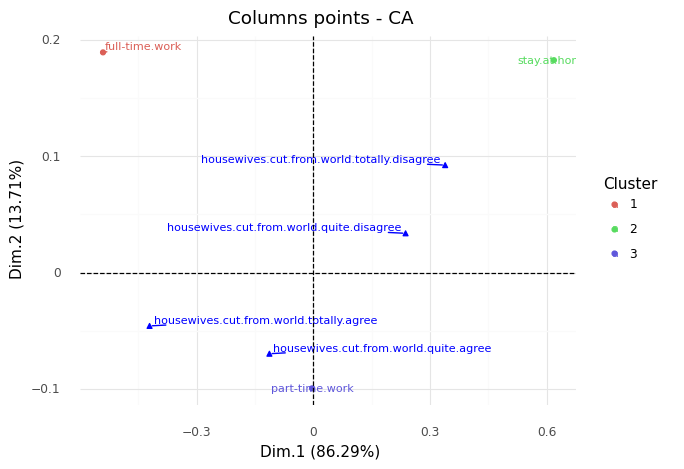

In [16]:
p = fviz_ca_col(my_ca,color=kmeans,repel=True)
print(p)

## Contributions

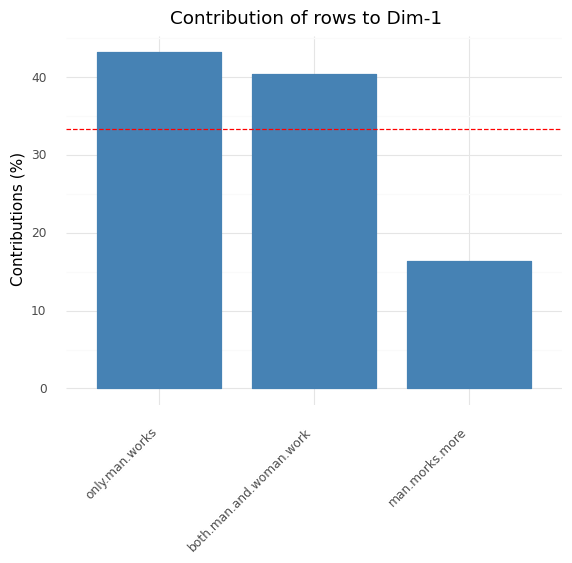

In [17]:
from scientisttools import fviz_contrib
p = fviz_contrib(my_ca,choice="row",axis=0)
print(p)

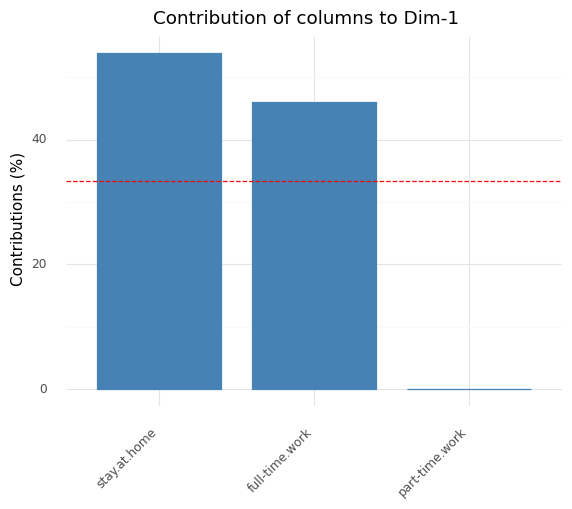

In [18]:
from scientisttools import fviz_contrib
p = fviz_contrib(my_ca,choice="col",axis=0)
print(p)

## Cosinus

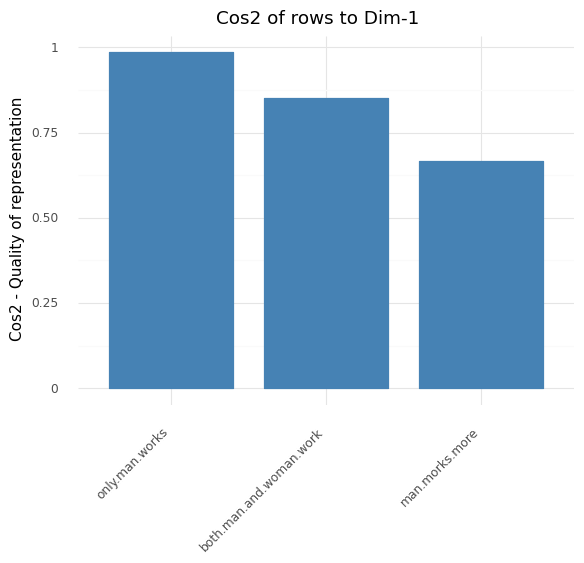

In [19]:
from scientisttools import fviz_cos2
p = fviz_cos2(my_ca,choice="row")
print(p)

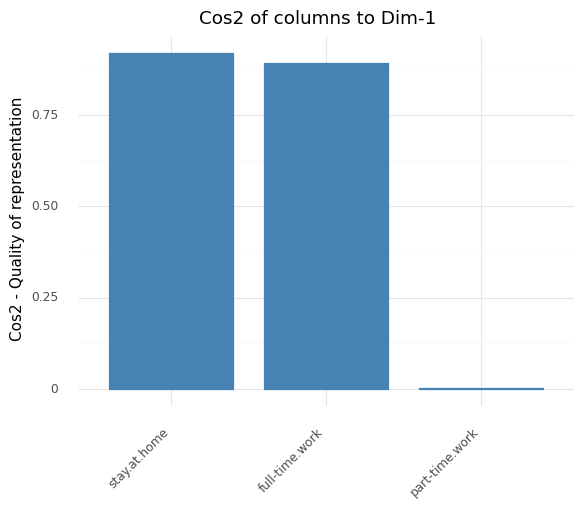

In [20]:
from scientisttools import fviz_cos2
p = fviz_cos2(my_ca,choice="col")
print(p)

# Predict

In [24]:
from scientisttools import supvarCA
col_sup = women_work.iloc[:,3:]
supvarcol = supvarCA(my_ca,X_col_sup=col_sup)
for keys in supvarcol["col"].keys():
    print(keys)
    print(supvarcol["col"][keys])
    print("\n")

coord
                                               Dim.1     Dim.2
housewives.cut.from.world.totally.agree    -0.421395 -0.045932
housewives.cut.from.world.quite.agree      -0.113230 -0.069851
housewives.cut.from.world.quite.disagree    0.236928  0.033732
housewives.cut.from.world.totally.disagree  0.338720  0.092381


cos2
                                               Dim.1     Dim.2
housewives.cut.from.world.totally.agree     0.988258  0.011742
housewives.cut.from.world.quite.agree       0.724347  0.275653
housewives.cut.from.world.quite.disagree    0.980133  0.019867
housewives.cut.from.world.totally.disagree  0.930765  0.069235


dist
housewives.cut.from.world.totally.agree       0.179684
housewives.cut.from.world.quite.agree         0.017700
housewives.cut.from.world.quite.disagree      0.057273
housewives.cut.from.world.totally.disagree    0.123266
Name: Sq. Dist., dtype: float64


